# Analisis data set usando Numpy

Se pide:
1. Importar el dataset en una matriz numpy en formato texto
2. Verificar si es necesario realizar limpieza y/o transformaciones de los datos para poder obtener una matriz numérica
3. En este ejercicio usar la estrategia de no borrar filas si faltan datos, en cambio completarlas con algun dato. Hay muchas tecnicas para esto, en este curso solamente completaremos con 0.
4. Calcular el promedio total recaudado por cada impuesto.
5. por cada fila hay una columna llamada "total" que representa la suma de la fila, los impuestos del dataset para ese mes-año. Por ejemplo si se toman las primeras filas y las primeras columnas:

  periodo	total	impuestos_sobre_ingresos_brutos	alumbrado_barrido_limpieza	impuesto_patentes	impuesto_sellos	.....
ene-97	224.1	135.8	65.2	15.9	6.8
....
feb-97	174.1	117	17.5	32.1	6.3	....

  Se pide verificar si la suma de los impuestos en cada linea/renglón corresponde con el valor de la columna 'total'. Hay muchas formas de hacer esto en python, podrías agregar una columna con la suma que realices de los impuestos y luego compararla, podrías hacer un bucle que recorra cada fila, la sume y la compare...podrías usar paradigma funcional (apply, map....no visto en este curso)
Del resultado de la comparación podrías comentar en pocos renglones porque piensas que pasa esto (spoiler: no siempre coinciden!) ?

6. Realizar un grafico de torta para algunos periodos/lineas que consideres interesante (ver apunte gráfico de tortas)

In [2]:
import numpy as np

url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/administracion-gubernamental-de-ingresos-publicos/recaudacion-impositiva/recaudacion-impositiva.csv'

1. Importar el dataset en una matriz numpy en formato texto

In [3]:
dataset = np.loadtxt(url, delimiter = ';', dtype = str, comments ='?')

print(dataset)

[['periodo' 'total' 'impuestos_sobre_ingresos_brutos' ...
  'plan_facilidades_pago' 'contribucion_por_publicidad'
  'gravamenes_varios']
 ['ene-97' '224.1' '135.8' ... '6.8' '0.1' '0.3']
 ['feb-97' '174.1' '117' ... '6.3' '1' '0.2']
 ...
 ['mar-23' '130190.6' '107785.1' ... '1698.7' '212.8' '851.8']
 ['abr-23' '158522.1' '129864' ... '1398.9' '33' '611.6']
 ['may-23' '164075.7' '141849.6' ... '1290.6' '38.9' '783.4']]


In [4]:
#Veo las columnas:
print(f'Cantidad columnas: {len(dataset[0,:])}')
print(list(dataset[0,:]))

Cantidad columnas: 9
['periodo', 'total', 'impuestos_sobre_ingresos_brutos', 'alumbrado_barrido_limpieza', 'impuesto_patentes', 'impuesto_sellos', 'plan_facilidades_pago', 'contribucion_por_publicidad', 'gravamenes_varios']


In [5]:
# Cantidad de registros
print(f'Cantidad de registros: {len(dataset[1:,0])}')

Cantidad de registros: 317


In [6]:
#Evaluamos los registros que tiene fecha
print(dataset[1:,0])

['ene-97' 'feb-97' 'mar-97' 'abr-97' 'may-97' 'jun-97' 'jul-97' 'ago-97'
 'sep-97' 'oct-97' 'nov-97' 'dic-97' 'ene-98' 'feb-98' 'mar-98' 'abr-98'
 'may-98' 'jun-98' 'jul-98' 'ago-98' 'sep-98' 'oct-98' 'nov-98' 'dic-98'
 'ene-99' 'feb-99' 'mar-99' 'abr-99' 'may-99' 'jun-99' 'jul-99' 'ago-99'
 'sep-99' 'oct-99' 'nov-99' 'dic-99' 'ene-00' 'feb-00' 'mar-00' 'abr-00'
 'may-00' 'jun-00' 'jul-00' 'ago-00' 'sep-00' 'oct-00' 'nov-00' 'dic-00'
 'ene-01' 'feb-01' 'mar-01' 'abr-01' 'may-01' 'jun-01' 'jul-01' 'ago-01'
 'sep-01' 'oct-01' 'nov-01' 'dic-01' 'ene-02' 'feb-02' 'mar-02' 'abr-02'
 'may-02' 'jun-02' 'jul-02' 'ago-02' 'sep-02' 'oct-02' 'nov-02' 'dic-02'
 'ene-03' 'feb-03' 'mar-03' 'abr-03' 'may-03' 'jun-03' 'jul-03' 'ago-03'
 'sep-03' 'oct-03' 'nov-03' 'dic-03' 'ene-04' 'feb-04' 'mar-04' 'abr-04'
 'may-04' 'jun-04' 'jul-04' 'ago-04' 'sep-04' 'oct-04' 'nov-04' 'dic-04'
 'ene-05' 'feb-05' 'mar-05' 'abr-05' 'may-05' 'jun-05' 'jul-05' 'ago-05'
 'sep-05' 'oct-05' 'nov-05' 'dic-05' 'ene-06' 'feb-

In [137]:
#Intentaremos separar el mes y el año. El mes lo guardaremos en formato numerico.

dict_meses = {'ene': 1,
              'feb': 2,
              'mar': 3,
              'abr': 4,
              'may': 5,
              'jun': 6,
              'jul': 7,
              'ago': 8,
              'sep': 9,
              'oct': 10,
              'nov': 11,
              'dic': 12}

meses = []
anios = []
anio_mes = []

for registro in dataset[1:,0]:
  #Separo entre mes y anio
  prueba = registro.split('-')

  mes = dict_meses[prueba[0]]
  meses.append(mes)

  anio_corto = int(prueba[1])
  if anio_corto in range(97,100):
    anio = 1900 + anio_corto
  else:
    anio = anio_corto + 2000
  anios.append(anio)

  anio_mes.append(int( str(anio) + str(mes)))

anios = np.array(anios)
meses = np.array(meses)
anio_mes = np.array(anio_mes)

print(anio_mes, anios, meses,sep = '\n\n')

[ 19971  19972  19973  19974  19975  19976  19977  19978  19979 199710
 199711 199712  19981  19982  19983  19984  19985  19986  19987  19988
  19989 199810 199811 199812  19991  19992  19993  19994  19995  19996
  19997  19998  19999 199910 199911 199912  20001  20002  20003  20004
  20005  20006  20007  20008  20009 200010 200011 200012  20011  20012
  20013  20014  20015  20016  20017  20018  20019 200110 200111 200112
  20021  20022  20023  20024  20025  20026  20027  20028  20029 200210
 200211 200212  20031  20032  20033  20034  20035  20036  20037  20038
  20039 200310 200311 200312  20041  20042  20043  20044  20045  20046
  20047  20048  20049 200410 200411 200412  20051  20052  20053  20054
  20055  20056  20057  20058  20059 200510 200511 200512  20061  20062
  20063  20064  20065  20066  20067  20068  20069 200610 200611 200612
  20071  20072  20073  20074  20075  20076  20077  20078  20079 200710
 200711 200712  20081  20082  20083  20084  20085  20086  20087  20088
  2008

In [8]:
anios = anios.reshape(1,len(anios))
meses = meses.reshape(1,len(meses))
anio_mes = anio_mes.reshape(1,len(anio_mes))

In [9]:
#Vemos los valores numericos
for i in dataset[1:,1:]:
  print(i)


['224.1' '135.8' '65.2' '15.9' '' '6.8' '0.1' '0.3']
['174.1' '117' '17.5' '32.1' '' '6.3' '1' '0.2']
['180.9' '111.8' '50.8' '11.8' '' '5.7' '0.5' '0.2']
['186.2' '126.6' '21.4' '32.6' '' '5.2' '0.2' '0.3']
['223.4' '129.5' '75.4' '12.6' '' '4.5' '1.1' '0.3']
['195' '128.8' '21.7' '37.9' '' '5.7' '0.4' '0.4']
['207.7' '133.7' '50.8' '15.4' '' '6.2' '1.3' '0.3']
['195.1' '144.1' '14.8' '28.4' '' '4.9' '2.6' '0.3']
['214.8' '143.5' '52.4' '13.7' '' '4.4' '0.5' '0.3']
['206' '148.2' '19' '34.2' '' '4' '0.4' '0.3']
['208.9' '141.8' '47.4' '14' '' '3.7' '1.8' '0.2']
['213.5' '145.3' '29.7' '32.4' '' '4.9' '0.8' '0.4']
['272.1' '151.2' '100' '15.3' '' '' '0.3' '5.3']
['216.2' '148.1' '15.8' '47' '' '' '0.1' '5.2']
['216.2' '142.7' '51.5' '15.1' '' '' '1.5' '5.4']
['217.6' '160.5' '22.9' '31.2' '' '' '0.5' '2.5']
['231.7' '154.3' '61.1' '13' '' '' '0.3' '3']
['217.8' '151.8' '27.3' '33.8' '' '' '1.4' '3.5']
['238.8' '160.9' '60.6' '15.2' '' '' '0.4' '1.7']
['215.3' '161.1' '21.5' '31.2' '' '

In [12]:
list(dataset[0,1:])

['total',
 'impuestos_sobre_ingresos_brutos',
 'alumbrado_barrido_limpieza',
 'impuesto_patentes',
 'impuesto_sellos',
 'plan_facilidades_pago',
 'contribucion_por_publicidad',
 'gravamenes_varios']

3. En este ejercicio usar la estrategia de no borrar filas si faltan datos, en cambio completarlas con algun dato. Hay m

In [121]:
dataset[dataset == ''] = '0'
registros = dataset[1:,1:].copy()
registros = registros.astype(float)
print(registros.shape)
print(registros)


(317, 8)
[[2.241000e+02 1.358000e+02 6.520000e+01 ... 6.800000e+00 1.000000e-01
  3.000000e-01]
 [1.741000e+02 1.170000e+02 1.750000e+01 ... 6.300000e+00 1.000000e+00
  2.000000e-01]
 [1.809000e+02 1.118000e+02 5.080000e+01 ... 5.700000e+00 5.000000e-01
  2.000000e-01]
 ...
 [1.301906e+05 1.077851e+05 6.565400e+03 ... 1.698700e+03 2.128000e+02
  8.518000e+02]
 [1.585221e+05 1.298640e+05 6.600600e+03 ... 1.398900e+03 3.300000e+01
  6.116000e+02]
 [1.640757e+05 1.418496e+05 8.396700e+03 ... 1.290600e+03 3.890000e+01
  7.834000e+02]]


4. Calcular el promedio de cada impuesto

In [122]:
print ( " Promedio de impuestos \n\n")

for i in range(1,8):
  print(f'{dataset[0,i+1]} :  ${registros[: , i ].mean(): ,.2f}')



 Promedio de impuestos 


impuestos_sobre_ingresos_brutos :  $ 8,608.01
alumbrado_barrido_limpieza :  $ 815.89
impuesto_patentes :  $ 533.44
impuesto_sellos :  $ 899.87
plan_facilidades_pago :  $ 192.18
contribucion_por_publicidad :  $ 9.29
gravamenes_varios :  $ 59.13


5. por cada fila hay una columna llamada "total" que representa la suma de la fila, los impuestos del dataset para ese mes-año. Por ejemplo si se toman las primeras filas y las primeras columnas:

  periodo	total	impuestos_sobre_ingresos_brutos	alumbrado_barrido_limpieza	impuesto_patentes	impuesto_sellos	.....
ene-97	224.1	135.8	65.2	15.9	6.8
....
feb-97	174.1	117	17.5	32.1	6.3	....

  Se pide verificar si la suma de los impuestos en cada linea/renglón corresponde con el valor de la columna 'total'. Hay muchas formas de hacer esto en python, podrías agregar una columna con la suma que realices de los impuestos y luego compararla, podrías hacer un bucle que recorra cada fila, la sume y la compare...podrías usar paradigma funcional (apply, map....no visto en este curso)
Del resultado de la comparación podrías comentar en pocos renglones porque piensas que pasa esto (spoiler: no siempre coinciden!) ?

In [136]:
iterador = 1
coinciden = 0
no_coinciden = 0

for registro in registros:
  if sum(registro[1:9]).round(2) == registro[0].round(2):
    status = 'coincide'
    coinciden += 1
  else:
    status = 'no coincide'
    no_coinciden += 1
  print(f'La fila {iterador} {status}')
  iterador += 1

print()
print(f'{coinciden} registros coinciden')
print(f'{no_coinciden} registros no coinciden ')

La fila 1 coincide
La fila 2 coincide
La fila 3 no coincide
La fila 4 no coincide
La fila 5 coincide
La fila 6 no coincide
La fila 7 coincide
La fila 8 coincide
La fila 9 coincide
La fila 10 no coincide
La fila 11 coincide
La fila 12 coincide
La fila 13 coincide
La fila 14 coincide
La fila 15 coincide
La fila 16 coincide
La fila 17 coincide
La fila 18 coincide
La fila 19 coincide
La fila 20 coincide
La fila 21 coincide
La fila 22 coincide
La fila 23 coincide
La fila 24 coincide
La fila 25 coincide
La fila 26 coincide
La fila 27 coincide
La fila 28 coincide
La fila 29 coincide
La fila 30 coincide
La fila 31 coincide
La fila 32 coincide
La fila 33 coincide
La fila 34 coincide
La fila 35 coincide
La fila 36 coincide
La fila 37 coincide
La fila 38 coincide
La fila 39 coincide
La fila 40 coincide
La fila 41 coincide
La fila 42 coincide
La fila 43 coincide
La fila 44 coincide
La fila 45 coincide
La fila 46 coincide
La fila 47 coincide
La fila 48 coincide
La fila 49 coincide
La fila 50 coinci

6. Realizar un grafico de torta para algunos periodos/lineas que consideres interesante (ver apunte gráfico de tortas)

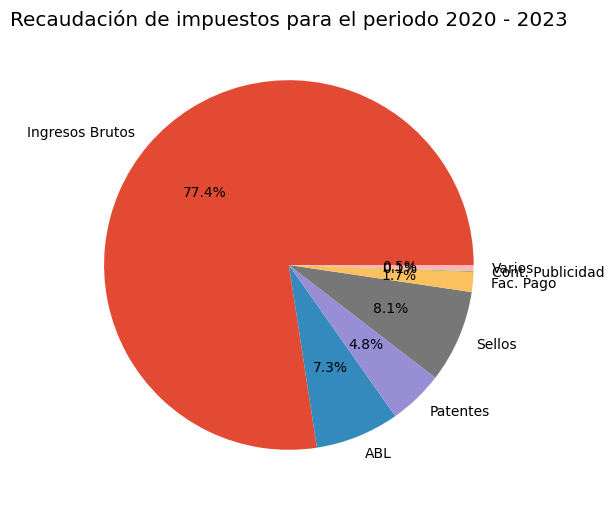

In [165]:
import matplotlib.pyplot as plt
from matplotlib import style

periodo = range(2020, 2023)

buscador = np.isin(anios,periodo)

sub_set = registros[buscador]

sumas = []


for columna in range(1,8):
  sumas.append(registros[: , columna ].sum().round(2))

columnas_grafico = ['Ingresos Brutos','ABL','Patentes','Sellos','Fac. Pago','Cont. Publicidad','Varios']

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,6))
ax.pie(sumas, labels=columnas_grafico,  autopct='%1.1f%%')
ax.set_title('Recaudación de impuestos para el periodo 2020 - 2023')

plt.show()